In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the data
gene_data = pd.read_csv("C:/Users/chemi/OneDrive/Programming/Gene_Expression_Data.csv")
gene_info = pd.read_csv("C:/Users/chemi/OneDrive/Programming/Gene_Information.csv")
sample_info = pd.read_csv("C:/Users/chemi/OneDrive/Programming/Sample_Information.tsv", sep='\t')


In [4]:
# Inspect the sample_info dataframe to find the correct column names
sample_info_df = pd.read_csv("C:/Users/chemi/OneDrive/Programming/Sample_Information.tsv", sep='\t')
print(sample_info_df.head())

# Create a mapping of old sample names to new names
mapping = {}
for index, row in sample_info_df.iterrows():
    old_name = row['patient']  
    phenotype = row['group']   
    new_name = "{phenotype}_{index + 1}"
    mapping[old_name] = new_name

# Rename columns in the gene expression data
gene_data.columns = [mapping.get(col, col) for col in gene_data.columns]

# Save the updated data
gene_data.to_csv('Updated_Gene_Expression_Data.csv', index=False)


            group     patient
GSM820516   tumor  patient: 1
GSM820517  normal  patient: 1
GSM820518   tumor  patient: 2
GSM820519  normal  patient: 2
GSM820520   tumor  patient: 3


In [5]:
# Ensure merged_data is correctly defined
if merged_data is not None:
    # Split the data based on phenotype
    tumor_data = merged_data[merged_data['Phenotype'].str.contains('tumor', case=False)]
    normal_data = merged_data[merged_data['Phenotype'].str.contains('normal', case=False)]

    # Save the split data if needed
    tumor_data.to_csv('Tumor_Data.csv', index=False)
    normal_data.to_csv('Normal_Data.csv', index=False)
else:
    print("Error: merged_data is None")


NameError: name 'merged_data' is not defined

In [6]:
# Calculate the average expression for each probe
tumor_avg = tumor_data.mean(axis=0).to_frame(name='Average_Expression_Tumor')
normal_avg = normal_data.mean(axis=0).to_frame(name='Average_Expression_Normal')

# Combine the averages into a single DataFrame
average_expression = tumor_avg.join(normal_avg)

# Save the average expression data if needed
average_expression.to_csv('Average_Expression_Comparison.csv')

NameError: name 'tumor_data' is not defined

In [7]:
# Calculate the fold change
average_expression['Fold_Change'] = (average_expression['Average_Expression_Tumor'] - average_expression['Average_Expression_Normal']) / average_expression['Average_Expression_Normal']

# Handle potential division by zero by replacing infinities with NaN
average_expression.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Save the fold change data if needed
fold_change_data = average_expression.csv('Fold_Change_Results.csv', index=False)

NameError: name 'average_expression' is not defined

In [8]:
# Load the fold change results and gene information
fold_change_data = pd.read_csv('Fold_Change_Results.csv')
gene_info = pd.read_csv('Gene_Information.csv')

# Filter for fold changes with absolute value greater than 5
significant_genes = fold_change_data[fold_change_data['Fold_Change'].abs() > 5]

# Merge with gene information to get gene annotations
# Assuming 'Gene_ID' is the common column in both datasets; adjust if needed
merged_data = significant_genes.merge(gene_info, on='Gene_ID', how='left')

# Add a new column to indicate expression status
merged_data['Expression_Higher_In'] = merged_data['Fold_Change'].apply(
    lambda x: 'Tumor' if x > 0 else 'Normal' if x < 0 else 'Equal'
)
# Save the results of significant genes
data = merged_data.to_csv('Significant_Genes_Fold_Change.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Fold_Change_Results.csv'

In [10]:
# Display the first few rows of the dataset
print(data.head())

# Check the data types and null values
print(data.info())

# Summary statistics
print(data.describe())

# Plot distribution of fold changes
plt.figure(figsize=(10, 6))
sns.histplot(data['Fold_Change'], bins=30, kde=True)
plt.title('Distribution of Fold Changes')
plt.xlabel('Fold Change')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--', label='No Change')
plt.legend()
plt.show()

NameError: name 'data' is not defined

In [11]:
# Count plot for expression status
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Expression_Higher_In', palette='viridis')
plt.title('Count of Genes Higher Expressed in Tumor vs Normal')
plt.ylabel('Number of Genes')
plt.xlabel('Expression Status')
plt.show()

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

NameError: name 'data' is not defined

<Figure size 800x500 with 0 Axes>

In [12]:
# Count the number of DEGs by chromosome
deg_counts = data['Chromosome'].value_counts()

# Convert to DataFrame for better plotting
deg_counts_df = deg_counts.reset_index()
deg_counts_df.columns = ['Chromosome', 'Count']

# Create the histogram (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='Chromosome', y='Count', data=deg_counts_df, palette='viridis')
plt.title('Distribution of Differentially Expressed Genes by Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Number of DEGs')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

NameError: name 'data' is not defined

In [13]:
# Count the number of upregulated and downregulated DEGs in Tumor samples
upregulated_count = data[data['Expression_Higher_In'] == 'Tumor'].shape[0]
downregulated_count = data[data['Expression_Higher_In'] == 'Normal'].shape[0]

# Calculate total DEGs
total_deg_count = upregulated_count + downregulated_count

# Calculate percentages
upregulated_percentage = (upregulated_count / total_deg_count) * 100
downregulated_percentage = (downregulated_count / total_deg_count) * 100

# Create a DataFrame for plotting
percentage_data = pd.DataFrame({
    'Expression Status': ['Upregulated', 'Downregulated'],
    'Percentage': [upregulated_percentage, downregulated_percentage]
})

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Expression Status', y='Percentage', data=percentage_data, palette='viridis')
plt.title('Percentage of DEGs Upregulated and Downregulated in Tumor Samples')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.show()

NameError: name 'data' is not defined

In [14]:
#load the raw data
gene_data = pd.read_csv("C:/Users/chemi/OneDrive/Programming/Gene_Expression_Data.csv")

# Set the gene identifiers as the index
gene_data.set_index(gene_data.columns[0], inplace=True)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(gene_data, cmap='viridis', cbar=True, xticklabels=True, yticklabels=True)
plt.title('Heatmap of Gene Expression by Sample')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002C21D201BC0> (for post_execute):


KeyboardInterrupt: 

c:\Users\chemi\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

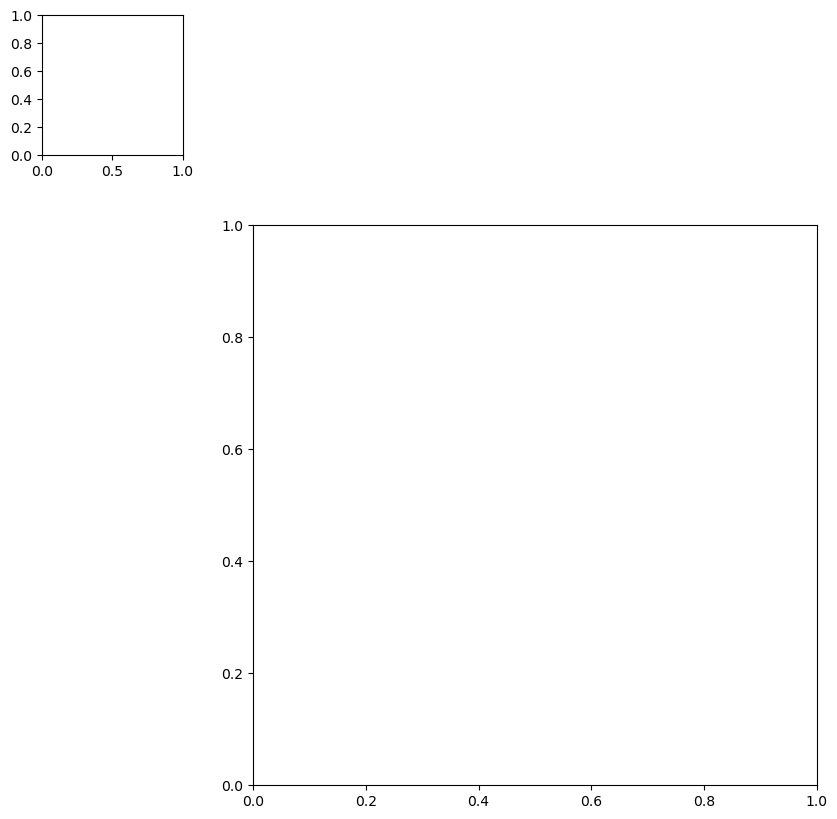

In [15]:
# Create the clustermap
plt.figure(figsize=(12, 8))
sns.clustermap(gene_data, cmap='viridis', cbar=True, xticklabels=True, yticklabels=True)
plt.title('Clustermap of Gene Expression by Sample')
plt.show()